# Lending Case Study by Abhishek Singh & Fouziya Memon

## Problem Statement -
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


## Exploratory Data Analysis

### Loan Dataset Extraction

In [1]:
## import python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import io 

In [2]:
#Extracting the dataset of past loan and its status along with other details from .csv
lc_data = pd.read_csv(f"F:\IITB\Lending_Loan\loan\loan.csv")

In [3]:
# Displaying the fetched data, added to first 5 rows to manually visualize the data
lc_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Below representing the number of rows - 39717 & Column - 111
lc_data.shape

(39717, 111)

In [5]:
#Checking for the duplicate rows in dataset based on id column

print(lc_data.duplicated(subset=None,keep='first').count())
duplicate_data=lc_data[lc_data.duplicated(['id'])]
duplicate_data

#There are no duplicate rows in loan dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


### Dataset Cleanup

#### Missing Value Analysis

In [6]:
#Checking count of NULL values in each column in dataset
print(lc_data.isnull().sum())

#Observation - There are many columns which has all the values as NULL

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
#NULL value analysis of the dataset in the form of percentage
print(lc_data.isna().mean()*100)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

<AxesSubplot:>

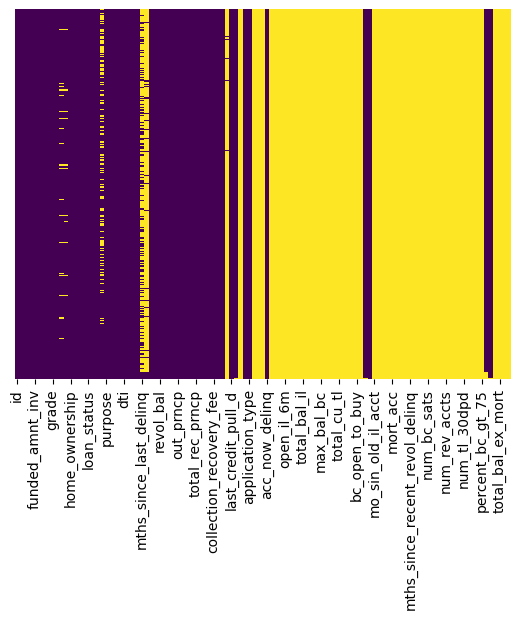

In [8]:
#Visualization of NULL value in the datasets
#Obeservation - All yellow colour marked are representing NULL values
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Assigning NULL values analysis in the form of percentage to lc_null_per to find the all column which has 100% NULL values
lc_null_per = lc_data.isna().mean()*100

In [10]:
#Extracting all columns which only NULL values
lc_null_columns=lc_null_per[lc_null_per>=100].index
lc_null_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [11]:
#Droping specific columns because of 100% null percentage
lc_data.drop(lc_null_per[lc_null_per>=100].index,axis=1,inplace=True) 

In [12]:
#Re checking the missing value analysis of the dataset in the form of percentage
#After dropping all columns having NULL values only
print(lc_data.isna().mean()*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
#Below representing the number of left over rows - 39717 & Column - 57
lc_data.shape

(39717, 57)

In [14]:
# Checking unique count of values of each column
# This analysis will help in deciding which other column can be dropped from dataset
unique_counts = lc_data.nunique().sort_values(ascending=True)

# Print the sorted unique value counts
print("Sorted unique value counts of each columns:")
print(unique_counts)

#Observation - Based on the below result and domain understanding all columns having value count 1 can be dropped
# It can be dropped due to sigular value and will not give any insight in EDA
#chargeoff_within_12_mths column is relevant for the analysis however it has no appropriate value, either '0' or NULL

Sorted unique value counts of each columns:
tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_deli

In [15]:
#Dropping of all column based on above observation
lc_data.drop(['delinq_amnt',"tax_liens",'chargeoff_within_12_mths','pymnt_plan','initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'application_type'], axis = 1, inplace = True)
lc_data.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [16]:
#Below representing the number of left over rows - 39717 & Columns - 48
lc_data.shape

(39717, 48)

In [17]:
# Re checking the unique value count to ensure covered all columns
unique_counts = lc_data.nunique().sort_values(ascending=True)

# Print the sorted unique value counts
print("Sorted unique value counts of each columns:")
print(unique_counts)


Sorted unique value counts of each columns:
next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138

In [18]:
# re checking  the NULL value analysis of the dataset in the form of percentage 
# It require to understand what all columns are still having NULL values
print(lc_data.isna().mean()*100)

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

<AxesSubplot:>

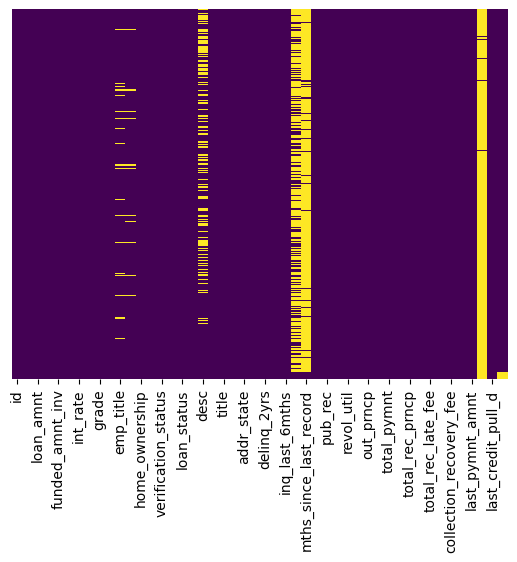

In [19]:
#Visualization of missing value in the datasets
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Observation - Still some columns has majority of values as NULL 

In [20]:
# Loan dataset after above cleanup
lc_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [21]:
# Left over columns
print(lc_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


#### Dataset is left with 48 columns, below are the observations on the few left over columns for further cleanup
- Removing __member_id__,__emp_title__,__url__,__zip_code__,__addr_state__ & __title__ as these are either not impact the analysis or having personal consumer specific details and will not play any significant role in analysis.
- There are some columns which represent post loan approval details hence dropping as the target of the analysis to find out the pattern of consumer of "Charged off", refer below cell for column list.
- Column __desc__ dropping off as its a text field and not in scope of as per target of the analysis.
- Column __funded_amnt__ is also not useful as __funded_amnt_inv__ shows the actual money disbursment hence dropping it.
- Columns __last_credit_pull_d__ & & __earliest_cr_line__ can play a vital role to find the insight however dropping off for now.
- __id__ column can also be deleted but keeping it as an index.

In [22]:
#Consumer specific column or either not require for analysis
lc_data.drop(['member_id','emp_title','url','zip_code','addr_state','title'], axis = 1, inplace = True)
lc_data.drop(["desc",], axis = 1, inplace = True)

In [23]:
lc_data.drop(["last_credit_pull_d"], axis = 1, inplace = True)
lc_data.drop(["funded_amnt"], axis = 1, inplace = True)
lc_data.drop(["earliest_cr_line"], axis = 1, inplace = True)

In [24]:
# Post loan approval columns, hence dropping off
lc_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d','mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)

In [25]:
# Loan dataset after above cleanup
lc_data.head(5)


,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9,0.0
1,1077430,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4,0.0
2,1077175,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50%,10,0.0
3,1076863,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,1,10,0,5598,21%,37,0.0
4,1075358,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,0,15,0,27783,53.90%,38,0.0


In [26]:
#Below representing the number of left over rows - 39717 & Columns - 24
lc_data.shape

(39717, 24)

In [27]:
# Left over columns
print(lc_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')


In [28]:
#NULL value analysis of the dataset in the form of percentage after all above cleanup
print(lc_data.isna().mean()*100)
# Obeservation - Now, only emp_length, revol_util, pub_rec_bankruptcies column has NULL values

id                      0.000000
loan_amnt               0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
pub_rec_bankruptcies    1.754916
dtype: float64


#### Handling Missing values
- emp_length, revol_util, pub_rec_bankruptcies has missing values
- Let observe with below codes to understand wehat kind of data and unique values are present.

#####  pub_rec_bankruptcies missing values handling

In [29]:
# Observing all unique values in pub_rec_bankruptcies column
lc_data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [30]:
#Filling '0' for all NULL values, as "number of public record bankruptcies" are not present for some rows hence filling with '0'
lc_data.pub_rec_bankruptcies.fillna(float('0'),inplace=True)

In [31]:
lc_data.pub_rec_bankruptcies.unique()
#Now there is no NULL values in the column

array([0., 1., 2.])

#####  revol_util missing values handling

In [32]:
# Observing all unique values in revol_bal column
lc_data.revol_bal.unique()

array([13648,  1687,  2956, ..., 27185, 66033, 85607], dtype=int64)

In [33]:
#Filling '0' for all NULL values, as "revol_util" are not present for some rows hence filling with '0'
lc_data.revol_util.fillna('0',inplace=True)

In [34]:
lc_data.revol_util.unique()
#Now there is no NULL values in the column

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

#####  emp_length missing values handling

In [35]:
print("Mode : "+ lc_data.emp_length.mode()[0])
lc_data.emp_length.value_counts()

#Observation - It can be seen Mode 10+ has higher frequency and also Null values
#It has very limited numbers hence replacing null with 10+ years

Mode : 10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [36]:
# Replacing NULL with 10+ years
lc_data.emp_length.fillna('10+ years',inplace=True)

In [37]:
#NULL value analysis of the dataset in the form of percentage after all clean up activity
print(lc_data.isna().mean()*100)

id                      0.0
loan_amnt               0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
dtype: float64


<AxesSubplot:>

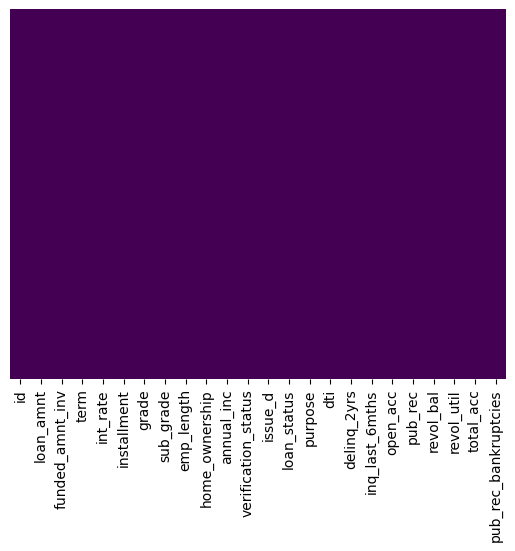

In [38]:
#Visualization of missing value in the datasets
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


##### Observation - It can be observed with above analisys and cleanup all NULL values has been handled

### Data Standardization

 - __Note__ : Observed dataset has a loan details of ongoing loans as well, as we are analyzing the Charged off insight, Loan staus having __Current__ value can be removed

In [39]:
# Unique value in Loan Status column
lc_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [40]:
# Removing data having Loan Status = Current
lc_data = lc_data[lc_data.loan_status != "Current"]
lc_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [41]:
#Below representing the number of left over rows - 38577 & Columns - 24
lc_data.shape

(38577, 24)

- Standardization of __emp_length__ column by removing 'years' suffix, '+' sign and considering <1 experiance as 0.
- Standardization of __revol_util__ & __int_rate__ by removing '%'.

#### Data Standardization of emp_length 

In [42]:
#Replacing <1 year with 0 year
lc_data['emp_length'] = lc_data['emp_length'].replace('< 1 year', '0 year')

In [43]:
#Formating employment length column to have only numbers
lc_data['emp_length']=lc_data.emp_length.str.extract('(\d+)')
lc_data.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9,0.0
1,1077430,2500,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4,0.0


In [44]:
#Checking Unique values
lc_data.emp_length.unique()

array(['10', '0', '3', '8', '9', '4', '5', '1', '6', '2', '7'],
      dtype=object)

#### Data Standardization of int_rate & revol_util

In [45]:
#Removing % symbol from intrest rate column so that it can be used in calculations
lc_data.int_rate = pd.to_numeric(lc_data.int_rate.apply(lambda x : x.split('%')[0]))

#Removing % symbol from revol_util column so that it can be used in calculations
lc_data.revol_util = pd.to_numeric(lc_data.revol_util.apply(lambda x : x.split('%')[0]))

## Univariate Analysis

### Univariate Analysis of Numerical variables
- Loan Amount
- dti
- funded_amnt_inv
- int_rate
- annual_inc

#### Loan Amount

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
0.75    15000.0
0.80    16000.0
0.85    20000.0
0.88    20000.0
0.90    21600.0
0.92    24000.0
0.93    25000.0
0.94    25000.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64


<AxesSubplot:xlabel='loan_amnt'>

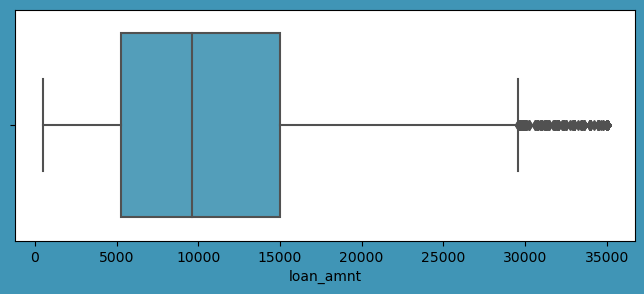

In [46]:
# Basic statistics with .describe() of Quantitative Variables
# Representing quatile values of multiple frequecy to check the variation in the data
# Below Box plot and quantile frequency explains the presence of outliers.
#However the variation doesn't seems to be much hence not removing outliers
print(lc_data['loan_amnt'].describe())

quantile_info_loan_amnt = lc_data.loan_amnt.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_loan_amnt)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(lc_data.loan_amnt,palette='GnBu_d')

#### dti

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


<AxesSubplot:xlabel='dti'>

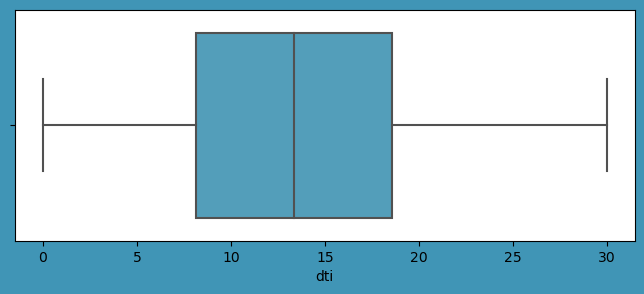

In [47]:
# Basic statistics with .describe() of Quantitative Variables
#Below box plot represents there is no outliers
print(lc_data['dti'].describe())

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(lc_data.dti,palette='GnBu_d')

#### funded_amnt_inv

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
0.75    14000.000000
0.80    15000.000000
0.85    17500.000000
0.88    19500.000000
0.90    19975.000000
0.92    21550.000000
0.93    22882.579280
0.94    23929.257273
0.95    24500.066590
0.96    24950.000000
0.97    25750.000000
0.98    29879.258133
0.99    34715.012285
Name: funded_amnt_inv, dtype: float64


<AxesSubplot:xlabel='funded_amnt_inv'>

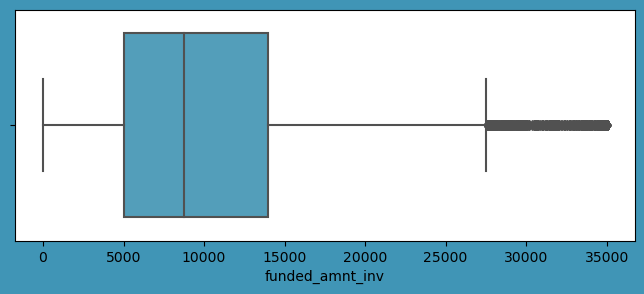

In [48]:
# Basic statistics with .describe() of Quantitative Variables
# Representing quatile values of multiple frequecy to check the variation in the data
# Below Box plot and quantile frequency explains the presence of outliers.
#However the variation doesn't seems to be much hence not removing outliers
print(lc_data['funded_amnt_inv'].describe())

quantile_info_fundedamnt = lc_data.funded_amnt_inv.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_fundedamnt)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(lc_data.funded_amnt_inv,palette='GnBu_d')

#### int_rate

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64
0.75    14.380
0.80    15.210
0.85    15.960
0.88    16.450
0.90    16.820
0.92    17.390
0.93    17.580
0.94    17.990
0.95    18.312
0.96    18.670
0.97    19.290
0.98    19.910
0.99    20.990
Name: int_rate, dtype: float64


<AxesSubplot:xlabel='int_rate'>

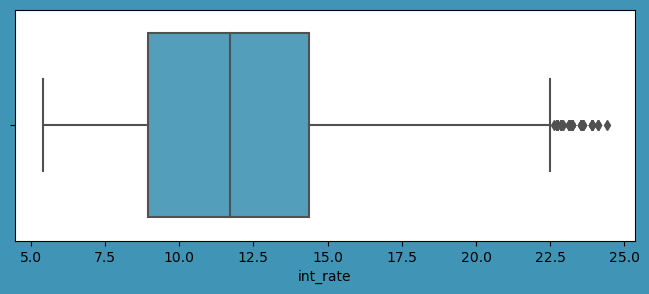

In [49]:
# Basic statistics with .describe() of Quantitative Variables
# Representing quatile values of multiple frequecy to check the variation in the data
# Below Box plot and quantile frequency explains the presence of outliers.
#However the higher iterest rate can be impacting on the charged off data hence not removing outliers.
print(lc_data['int_rate'].describe())

quantile_info_int_rate= lc_data.int_rate.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_int_rate)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(lc_data.int_rate,palette='GnBu_d')

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

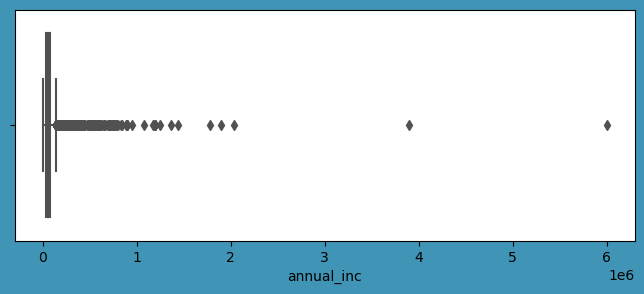

In [50]:
# Basic statistics with .describe() of Quantitative Variables
# Representing quatile values of multiple frequecy to check the variation in the data
# Below Box plot and quantile frequency explains the presence of outliers.
# Box plot shows there are significant outliers and needs to treateed.
print(lc_data['annual_inc'].describe())

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(lc_data.annual_inc,palette='GnBu_d')

In [51]:
# Checking multiple quantile to see the max varisation in data to select the % to remove outliers
quantile_info = lc_data.annual_inc.quantile([0.25,0.50, 0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
quantile_info

0.25     40000.00
0.50     58868.00
0.75     82000.00
0.80     90000.00
0.85    100000.00
0.88    108057.72
0.90    115000.00
0.92    122000.00
0.93    127500.00
0.94    134000.00
0.95    140004.00
0.96    150000.00
0.97    165000.00
0.98    187000.00
0.99    234144.00
Name: annual_inc, dtype: float64

In [52]:
#Onwards 97% quatile can see a large variation in terms of previous quantile hence removing data beyond 97%
lc_data = lc_data[lc_data["annual_inc"] < lc_data["annual_inc"].quantile(0.97)]


After Removal of Outliers :
count     37384.000000
mean      62624.944714
std       30214.059450
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       80000.000000
max      164000.000000
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

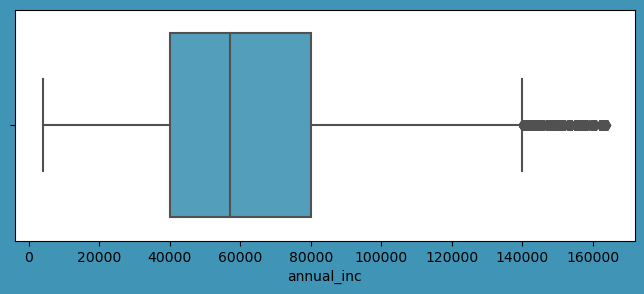

In [53]:
#Removing Outliers
# After removal of ourtliers, box plot shows now the data is more significant
print('After Removal of Outliers :')
print(lc_data["annual_inc"].describe())

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(lc_data.annual_inc,palette='GnBu_d')

## Derive Columns For Analysis -

In [54]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately for loan issued date

lc_data.issue_d = pd.to_datetime(lc_data.issue_d, format='%b-%y')
lc_data['year']=lc_data['issue_d'].dt.year
lc_data['month']=lc_data['issue_d'].dt.month

lc_data.head(5)

# Observations
# Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,1077501,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.7,9,0.0,2011,12
1,1077430,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,5,3,0,1687,9.4,4,0.0,2011,12
2,1077175,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2,2,0,2956,98.5,10,0.0,2011,12
3,1076863,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1,10,0,5598,21.0,37,0.0,2011,12
5,1075269,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,3,9,0,7963,28.3,12,0.0,2011,12


In [55]:
#creating bins for int_rate,open_acc,revol_util,total_acc,annual_inc.
#Converting it as a categorical data to see the various insights.
lc_data['int_rate_groups'] = pd.cut(lc_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
lc_data['open_acc_groups'] = pd.cut(lc_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
lc_data['revol_util_groups'] = pd.cut(lc_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
lc_data['total_acc_groups'] = pd.cut(lc_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
lc_data['annual_inc_groups'] = pd.cut(lc_data['annual_inc'], bins=8,precision =0,labels =['0k-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-170k'])

In [56]:
#creating bins for installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups.
#Converting it as a categorical data to see the various insights.
lc_data['installment_groups'] = pd.cut(lc_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
lc_data['funded_amnt_inv_group'] = pd.cut(lc_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
lc_data['loan_amnt_groups'] = pd.cut(lc_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
lc_data['dti_groups'] = pd.cut(lc_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [57]:
#Below representing the number of left over rows - 37384 & Columns - 35
lc_data.shape

(37384, 35)

In [58]:
lc_data.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'year', 'month',
       'int_rate_groups', 'open_acc_groups', 'revol_util_groups',
       'total_acc_groups', 'annual_inc_groups', 'installment_groups',
       'funded_amnt_inv_group', 'loan_amnt_groups', 'dti_groups'],
      dtype='object')

### Univariate Analysis of Categorical variables
#### Below analysis is for getting an insight of loan application count with major categorical columns for both Charged off & Fully paid loans
- term
- loan status
- grade & sub_grade
- home_ownership
- verification_status
- purpose
- emp_length

In [59]:
# Loan dataset after above cleanup
lc_data.head(5)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,1077501,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.7,9,0.0,2011,12,9%-13%,2-10,80-100,2-20,0k-20k,145-274,0-5k,0-5k,24-30
1,1077430,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,5,3,0,1687,9.4,4,0.0,2011,12,13%-17%,2-10,0-20,2-20,20k-40k,14-145,0-5k,0-5k,0-6
2,1077175,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2,2,0,2956,98.5,10,0.0,2011,12,13%-17%,2-10,80-100,2-20,0k-20k,14-145,0-5k,0-5k,6-12
3,1076863,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1,10,0,5598,21.0,37,0.0,2011,12,13%-17%,2-10,20-40,20-37,40k-60k,274-403,5k-10k,5k-10k,18-24
5,1075269,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,3,9,0,7963,28.3,12,0.0,2011,12,5%-9%,2-10,20-40,2-20,20k-40k,145-274,0-5k,0-5k,6-12


#### Univariate Analysis of Loan term and Loan Status

Percentage of Fully paid and Charged off loan data  in camparison to term
 36 months    75.577787
 60 months    24.422213
Name: term, dtype: float64
Percentage of Fully paid and Charged off in dataset
Fully Paid     85.274449
Charged Off    14.725551
Name: loan_status, dtype: float64


Text(0, 0.5, 'Loan Application Count')

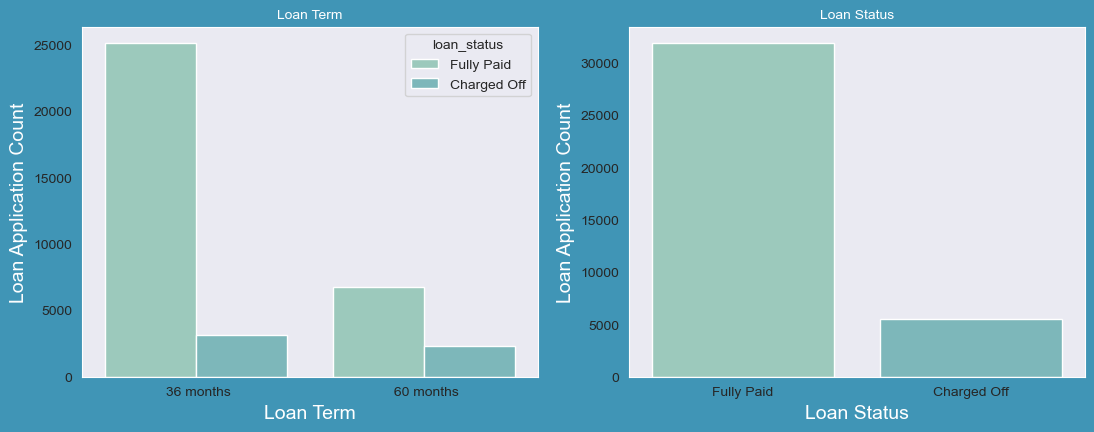

In [60]:
#Univariate Analysis - Loan term and Loan Status
print('Percentage of Fully paid and Charged off loan data  in camparison to term')
print((lc_data.term.value_counts()*100)/len(lc_data))
print('Percentage of Fully paid and Charged off in dataset')
print((lc_data.loan_status.value_counts()*100)/len(lc_data))
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'term', hue = 'loan_status',data = lc_data)
ax.set_title('Loan Term',fontsize=10,color='w')
ax.set_xlabel('Loan Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'loan_status',data = lc_data)
ax.set_title('Loan Status',fontsize=10,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations -

#Loan term - Consumer usually choose 36 months loan period approx 75%
#Slightly taking 36 months consumers go for a charged off.
# It shows term doesn't impact much on consumer to go for a charged off

# Loan Status - Majority of consumer approax 85% are fully paying the loan

#### Univariate Analysis of Purpose of loan

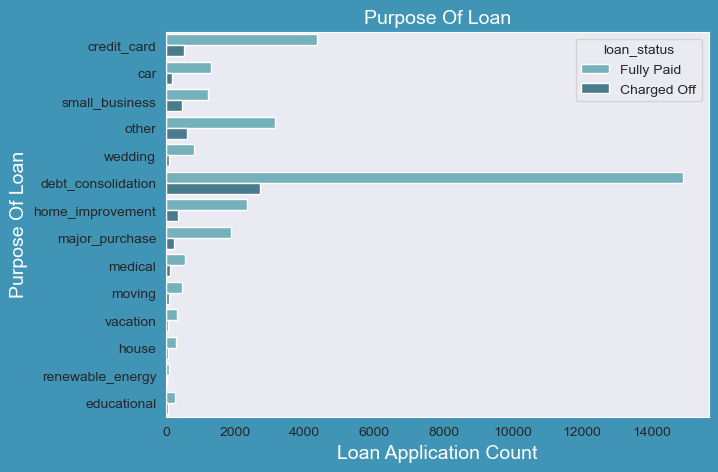

In [61]:
#Univariate Analysis - Purpose Of Loan
(lc_data.purpose.value_counts()*100)/len(lc_data)
plt.figure(figsize=(7,5),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=lc_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation.
# Number of chraged off count also high too for these loans.

#### Univariate Analysis of Home Ownership & Verification status

In [62]:
# Befor analyzing Home ownership, noticed some 'None' values in data hence replacing with 'Other'
#checking unique values for home_ownership
lc_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [63]:
#replacing 'NONE' with 'OTHERS'
lc_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [64]:
#checking unique values for home_ownership
lc_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

Percentage of Fully paid and Charged off loan data in camparison to home_ownership
RENT        48.708003
MORTGAGE    43.269848
OWN          7.762679
OTHER        0.259469
Name: home_ownership, dtype: float64
Percentage of Fully paid and Charged off loan data in camparison to verification_status
Not Verified       44.018832
Verified           31.034667
Source Verified    24.946501
Name: verification_status, dtype: float64


Text(0, 0.5, 'Loan Application Count')

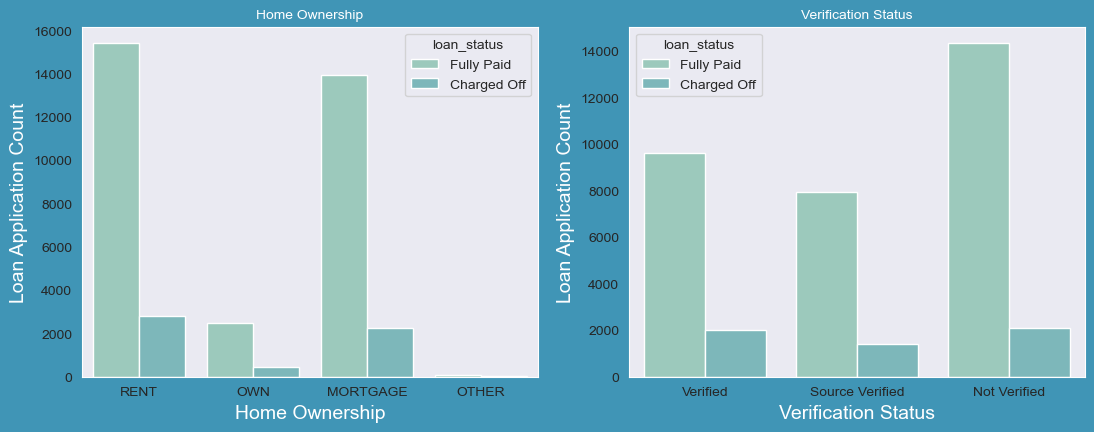

In [65]:
#Univariate Analysis - Loan term and Loan Status
print('Percentage of Fully paid and Charged off loan data in camparison to home_ownership')
print((lc_data.home_ownership.value_counts()*100)/len(lc_data))
print('Percentage of Fully paid and Charged off loan data in camparison to verification_status')
print((lc_data.verification_status.value_counts()*100)/len(lc_data))
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'home_ownership', hue = 'loan_status',data = lc_data)
ax.set_title('Home Ownership',fontsize=10,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'verification_status', hue = 'loan_status',data = lc_data)
ax.set_title('Verification Status',fontsize=10,color='w')
ax.set_xlabel('Verification Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations -

# Observations :
# home_ownership - Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is slightly high too.

# verification_status- Below plot shows that most of them are not verified.
# Non impacting much on the charged off Criteria

#### Univariate Analysis of Employment length

Percentage of Fully paid and Charged off loan data in camparison to Employment length
10    24.432912
0     11.783116
2     11.127755
3     10.448320
4      8.698909
5      8.292318
1      8.273593
6      5.641451
7      4.451102
8      3.680719
9      3.169805
Name: emp_length, dtype: float64


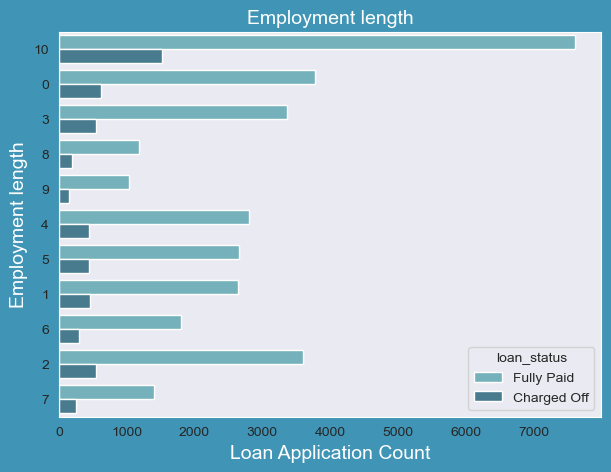

In [66]:
#Univariate Analysis - Employment length
print('Percentage of Fully paid and Charged off loan data in camparison to Employment length')
print((lc_data.emp_length.value_counts()*100)/len(lc_data))
(lc_data.purpose.value_counts()*100)/len(lc_data)
plt.figure(figsize=(7,5),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(y="emp_length",data=lc_data,hue='loan_status',palette='GnBu_d')
ax.set_title('Employment length',fontsize=14,color='w')
ax.set_ylabel('Employment length',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken by 10+ years consumer
# Applicant numbers are high from these categories so charged off is slightly high too.

#### Univariate Analysis of Grade and SubGrade

In [67]:
# Standardization of Subgrade for further analysis
lc_data.sub_grade = pd.to_numeric(lc_data.sub_grade.apply(lambda x : x[-1]))
lc_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

Text(0, 0.5, 'Loan Application Count')

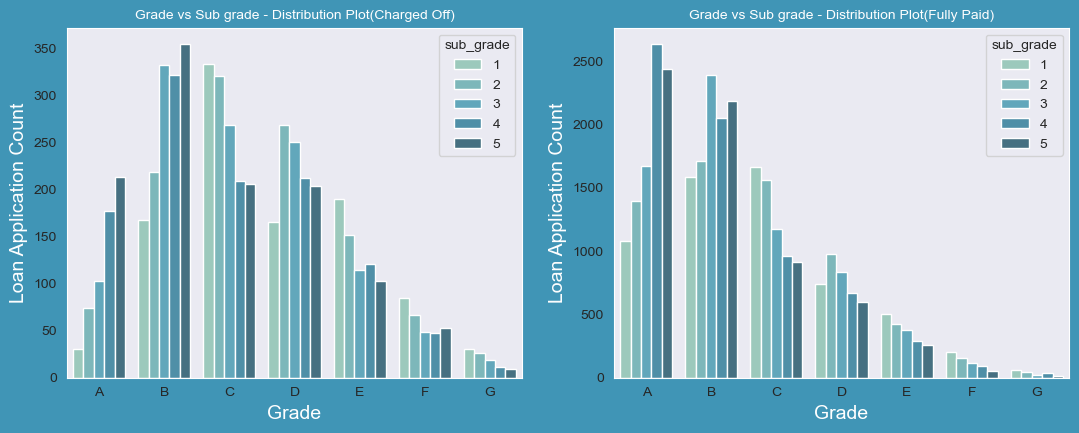

In [68]:
#Univariate Analysis - Grade and SubGrade
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Grade vs Sub grade - Distribution Plot(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = lc_data[lc_data.loan_status == 'Fully Paid'])
ax.set_title('Grade vs Sub grade - Distribution Plot(Fully Paid)',fontsize=10,color='w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

#Observations -

#Grade & Subgrade impact on Charged Off & Fully Paid loan -
#It can be seen Grade A has less number of Charged off loan in comparison to Fully paid
# Consumers wirth Grade B has more high chance of Charge off in comparisonto Grade A

### Univariate Analysis for rest of the Categorical data for only Charge off loan status
- int_rate_groups
- open_acc_groups
- revol_util_groups
- total_acc_groups
- annual_inc_groups
- installment_groups
- funded_amnt_inv_group
- loan_amnt_groups
- dti_groups
- issue_d(Month & Year)
- pub_rec
- inq_last_6mths
- pub_rec_bankruptcies

#### Univariate analysis of int_rate_groups & open_acc_groups

Text(0, 0.5, 'Loan Application Count')

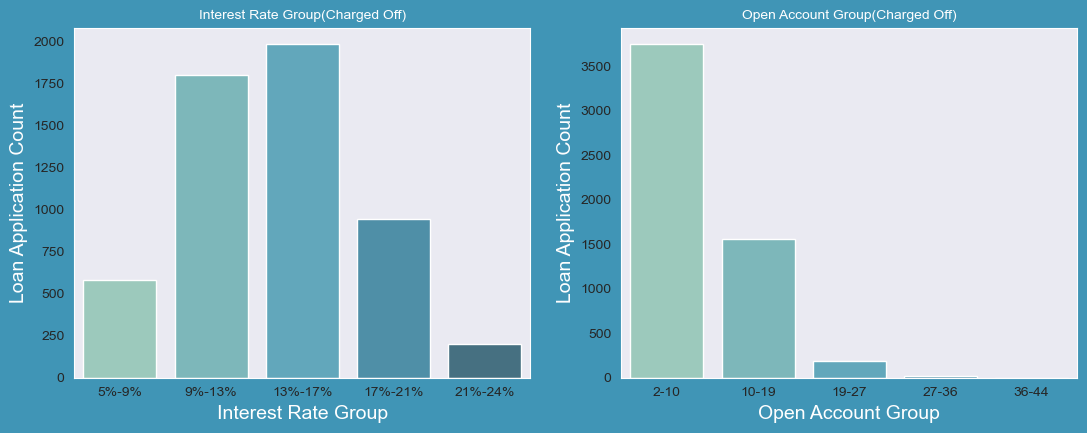

In [69]:
#Univariate Analysis - int_rate_groups and open_acc_groups
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'int_rate_groups',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Interest Rate Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Interest Rate Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'open_acc_groups',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Open Account Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Open Account Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations -

# Observations :
# Interest Rate Group - Below plot shows that most of Charged Off happen for loan issue for group 13%-17%.

# Open Account Group - Below plot shows that consumer having 2-10 account mostly like to Charged off loan


#### Univariate analysis of revol_util_groups & total_acc_groups

Text(0, 0.5, 'Loan Application Count')

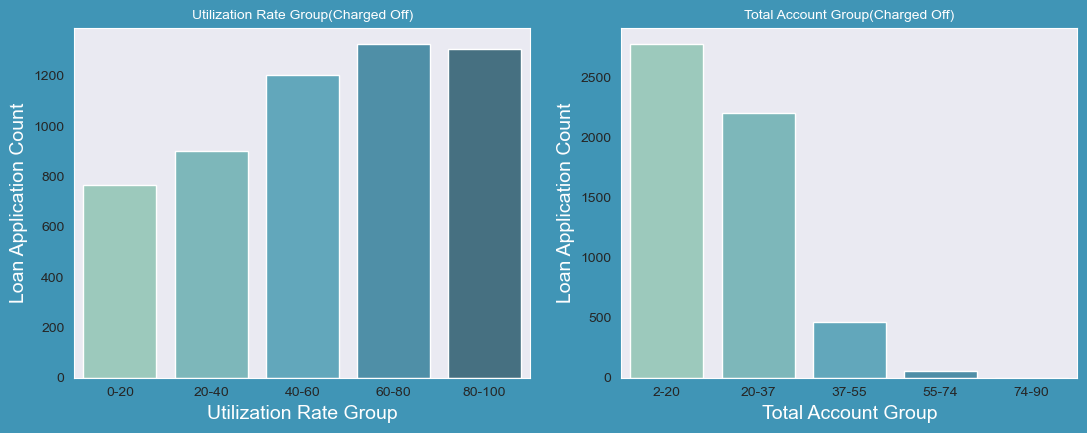

In [70]:
#Univariate Analysis - revol_util_groups & total_acc_groups
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'revol_util_groups',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Utilization Rate Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Utilization Rate Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'total_acc_groups',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Total Account Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Total Account Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations :
# Utilization Rate Group - Below plot shows consumer having more utilization rate are most likely to Charged off loan.

# Total Account Group- Below plot shows that consumer having 2-20 total account mostly like to Charged off loan

#### Univariate analysis of dti group & pub_rec

Text(0, 0.5, 'Loan Application Count')

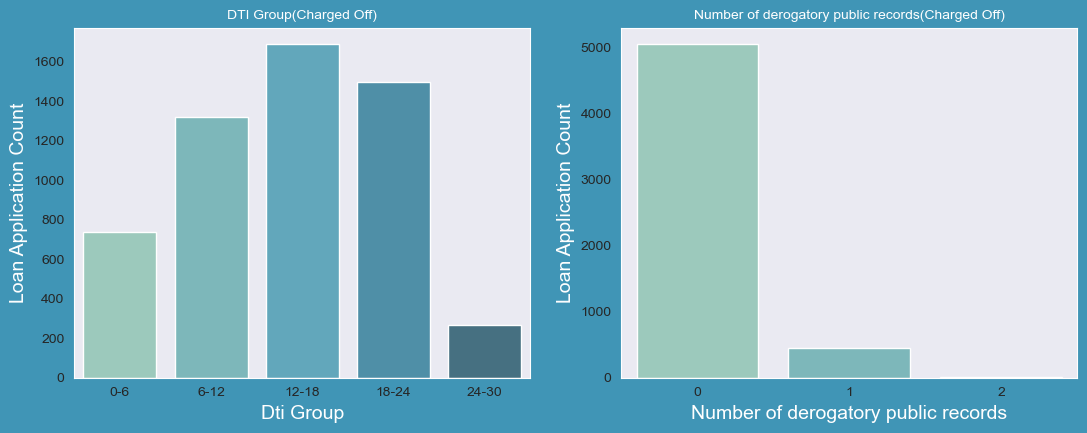

In [71]:
#Univariate Analysis - dti group & pub_rec
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'dti_groups',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('DTI Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Dti Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'pub_rec',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Number of derogatory public records(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Number of derogatory public records',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations :
# Dti group - Below plot shows that consumer having 12-18 Dti ratio are mot likely to Charged off loan

# pub_rec- It seems it doesn't have proper data to analyze and for most consumer this value is note present


#### Univariate analysis of inq_last_6mths & pub_rec_bankruptcies

Text(0, 0.5, 'Loan Application Count')

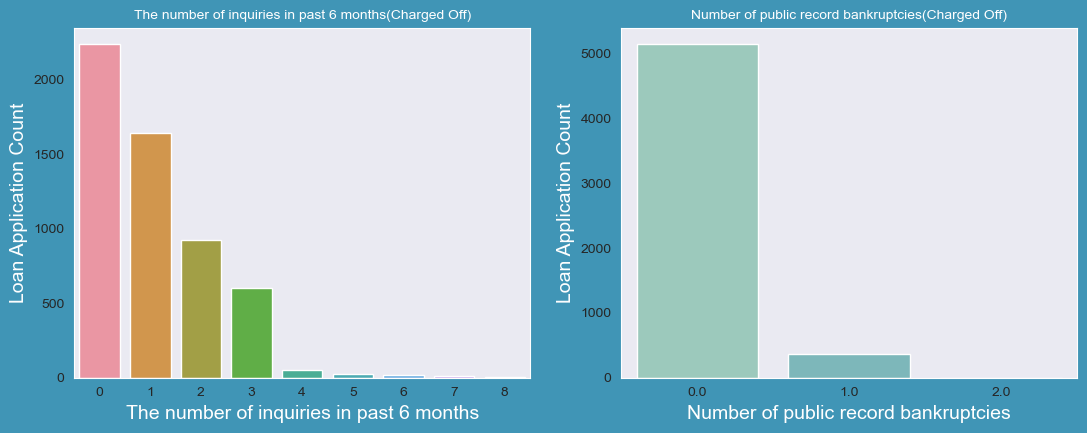

In [72]:
#Univariate Analysis - nq_last_6mths & pub_rec_bankruptcies
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'inq_last_6mths',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('The number of inquiries in past 6 months(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('The number of inquiries in past 6 months',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'pub_rec_bankruptcies',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Number of public record bankruptcies(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Number of public record bankruptcies',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations :
# number of inquiries in past 6 months(inq_last_6mths) -
# Below plot shows that as the enquiry number increase the charge off loan chances goes less.

# pub_rec_bankruptcies- It seems it doesn't have proper data to analyze and for most consumer this value is note present

#### Univariate analysis of funded_amnt_inv_group & loan_amnt_groups

Text(0, 0.5, 'Loan Application Count')

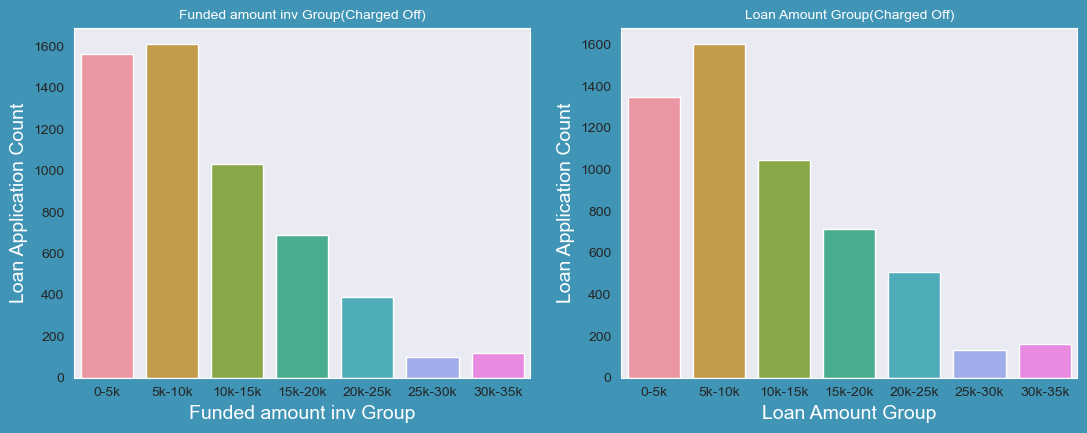

In [73]:
#Univariate Analysis - Funded amount inv & Loan amount 
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'funded_amnt_inv_group',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Funded amount inv Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Funded amount inv Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'loan_amnt_groups',data=lc_data[lc_data.loan_status == 'Charged Off'])
ax.set_title('Loan Amount Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Loan Amount Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   


# Observations :
# Funded amount inv & Loan amount -
#Below plot shows that loan Charged off happen for small loan amount and the risk descreased as the amount increased

#### Univariate analysis of annual_inc_groups

Text(0, 0.5, 'Loan Application Count')

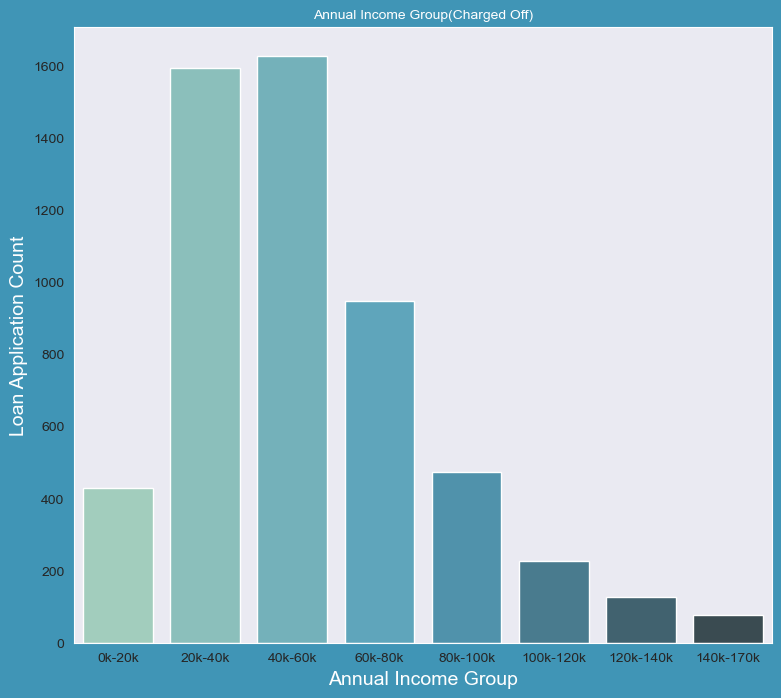

In [74]:
# Univariate Analysis - annual_inc_groups

plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(x = 'annual_inc_groups',data=lc_data[lc_data.loan_status == 'Charged Off'],palette='GnBu_d')
ax.set_title('Annual Income Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Annual Income Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')          

# Observations :
# Below plot shows that consumer having annual income between 20k - 60 are more likely to for a loan Charge off

#### Univariate analysis of installment_groups

Text(0, 0.5, 'Loan Application Count')

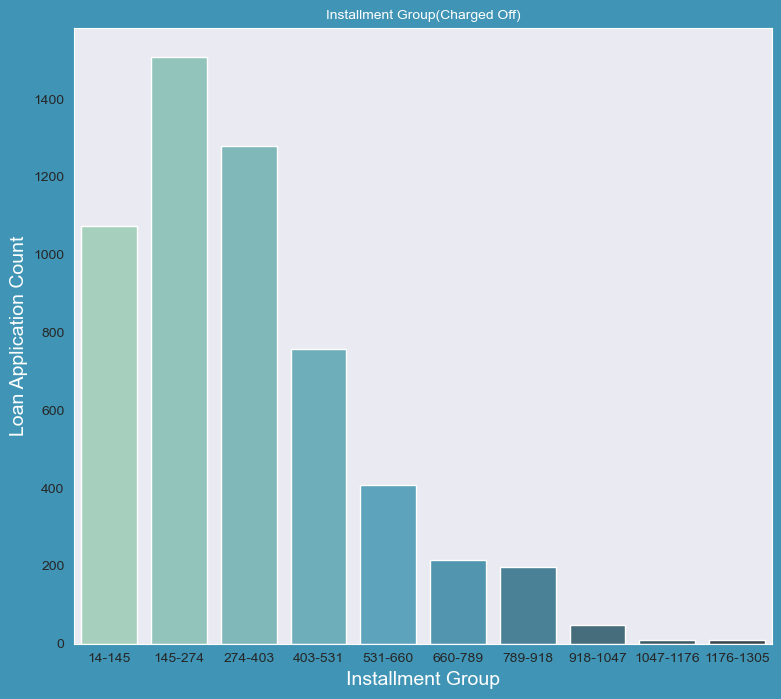

In [75]:
# Univariate Analysis - installment_groups
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(x = 'installment_groups',data=lc_data[lc_data.loan_status == 'Charged Off'],palette='GnBu_d')
ax.set_title('Installment Group(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Installment Group',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')         

# Observations :
# Below plot shows that consumer having Installment between 145-274 are more likely to for a loan Charge off

#### Univariate analysis of Loan Issue date

Text(0, 0.5, 'Loan Application Count')

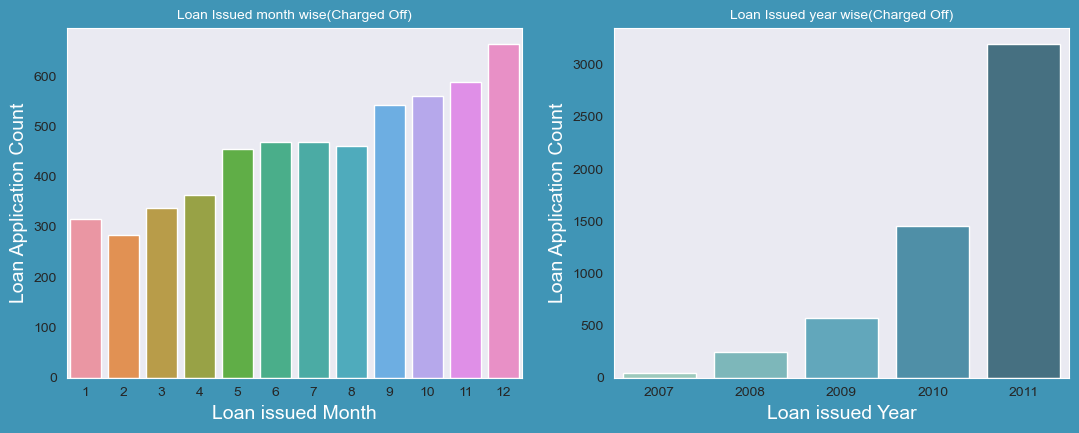

In [76]:
#Univariate Analysis - Loan Issue date
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x='month', data= lc_data[lc_data['loan_status']=='Charged Off'])
ax.set_title('Loan Issued month wise(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Loan issued Month',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x='year', data=lc_data[lc_data['loan_status']=='Charged Off']) 
ax.set_title('Loan Issued year wise(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Loan issued Year',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

# Observations :
# Below plot shows that loan issues in last 3 month(mainly in Dec month) having a higher chance of loan Charged off
# In Year 2011 most of the loan Charged off happen.
 

# Observation summary of above univariate analysis

### The above analysis with respect to the charged off loans for each column suggests the following. There is a more probability of Charged off when : 

- Term of 36 months
- Consumer who use the loan for Debt consolidation
- Consumer having house_ownership as 'RENT' or 'MORTGAGE'
- When loan status is not verified 
- Consumer with employement length of 10 years
- Grade B 
- Consumer who get the loan with interest rate between 13-17%
- Consumer who have 2-10 open account & 2 -20 total account
- Consumer having utilization rate between 60 - 100
- Dti ratio is between 12-18
- When the number of derogatory public records is 0(It can be due to not having proper data for all consumer)
- When the no of enquiries in last 6 months is 0
- When funded & Loan amount by consumer is between 5000-10000
- Consumer who have an income of range 20k - 60K
- When monthly installments are between 145-274

## Correlation Matrix

In [77]:
# Selecting Numeric columns for Correlation matrix
numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec',]

In [78]:
correlation_matrix = lc_data[numeric_columns].corr()

##### Below Correlation maxtrix shows high corelation between Installment, Loan amount and funded amount inv

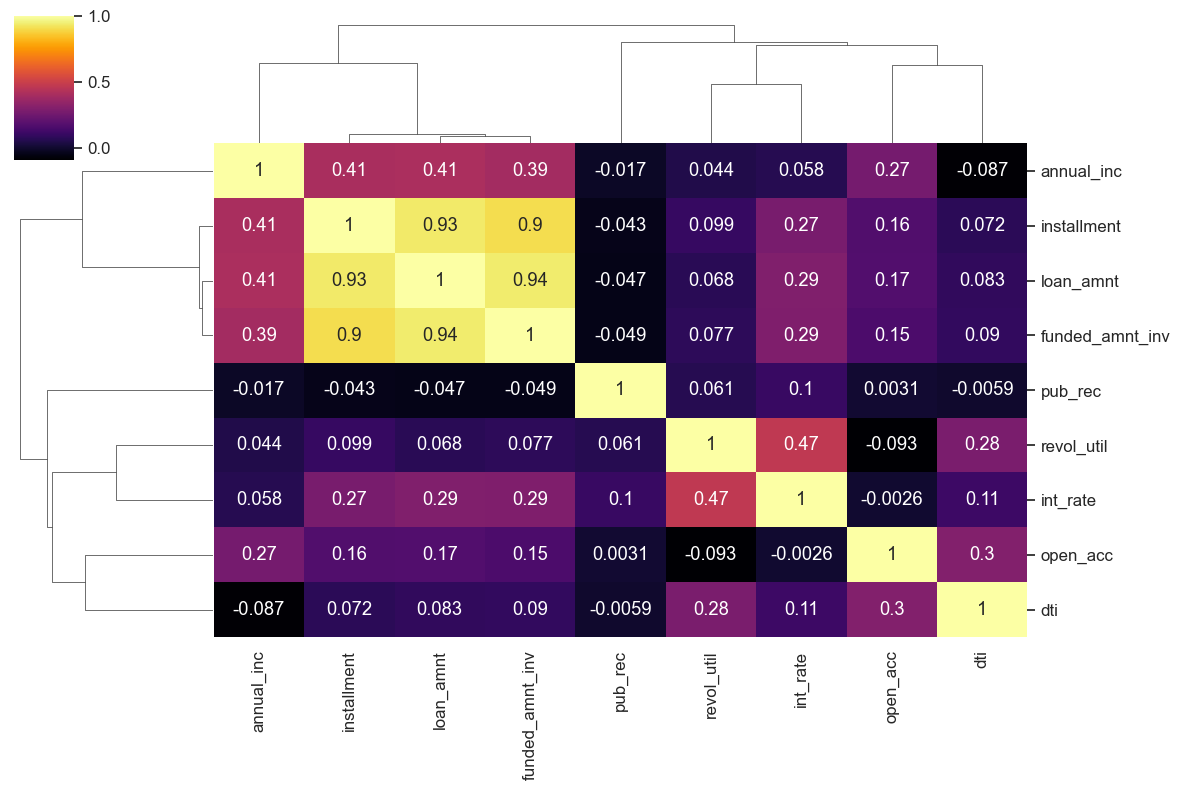

In [79]:
sns.set(font_scale=1.1)
sns.clustermap(correlation_matrix,annot=True,figsize=(12, 8),cmap="inferno")
plt.show()


## Bivariate Analysis

##### Loan Amount & Annual Income are most important column for Bivariate analysis hence comparing each with all other significant other categorical column


#### Annual Income Bivariate Analysis 

Text(0, 0.5, 'Purpose')

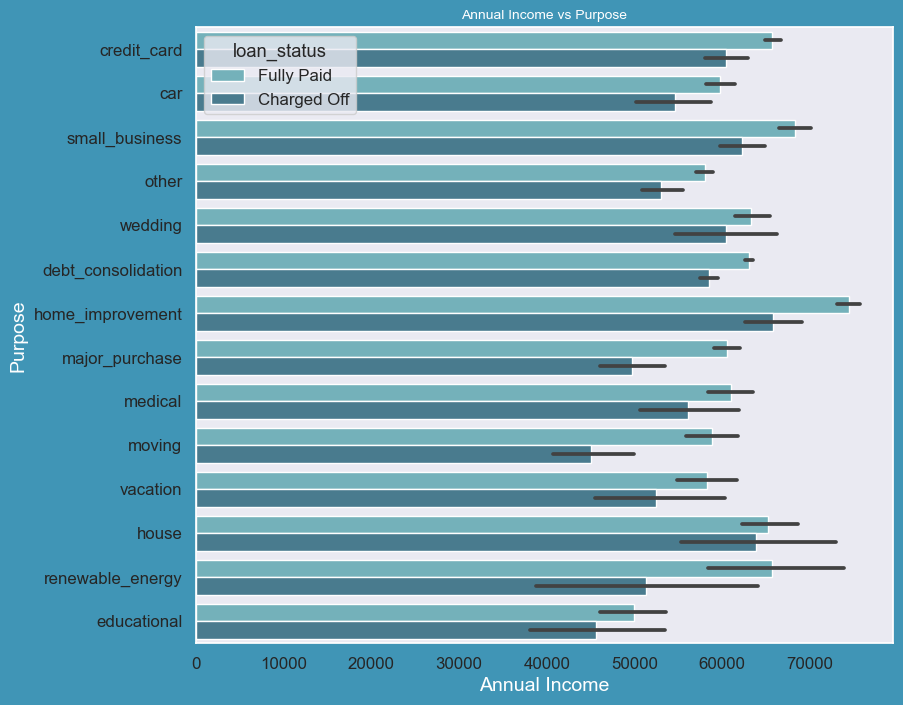

In [80]:
#Bivariate Analysis - Annual Income vs Purpose
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='annual_inc', y='purpose', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Annual Income vs Purpose',fontsize=10,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color = 'w')
ax.set_ylabel('Purpose',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that Consumer taking loan for 'home improvement' and have annual income of 60k -70k
# are more likely to loan Charged Off


Text(0, 0.5, 'Employment length')

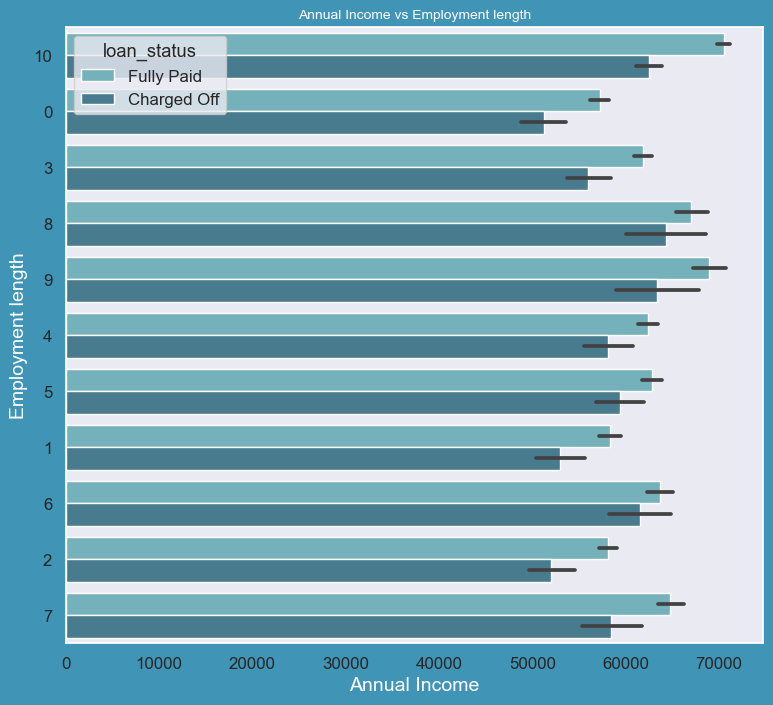

In [81]:
#Bivariate Analysis - Annual Income vs Employment length
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='annual_inc', y='emp_length', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Annual Income vs Employment length',fontsize=10,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color = 'w')
ax.set_ylabel('Employment length',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that Consumer employment length of 8 years and have annual income of 60k -70k
# are more likely to loan Charged Off

Text(0, 0.5, 'Annual Income')

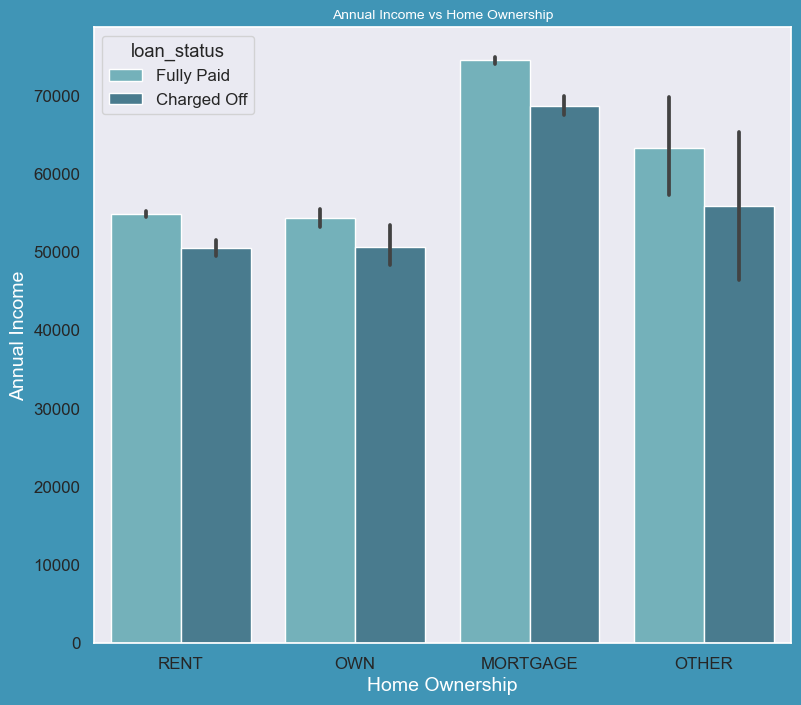

In [82]:
#Bivariate Analysis - Annual Income vs home_ownership
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='home_ownership', y='annual_inc', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Annual Income vs Home Ownership',fontsize=10,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Annual Income',fontsize=14,color = 'w')    

# Observations :
# Below plot shows that Consumer employment length of 8 years and have annual income of 60k -70k
# are more likely to loan Charged Off

Text(0, 0.5, 'Annual Income')

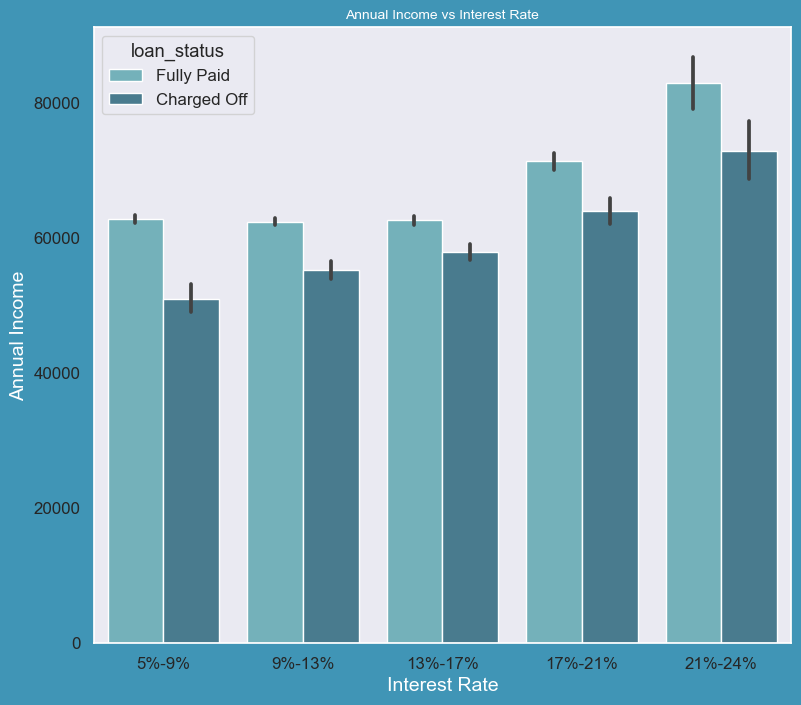

In [83]:
#Bivariate Analysis - Annual Income vs int_rate group
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='int_rate_groups', y='annual_inc', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Annual Income vs Interest Rate',fontsize=10,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Annual Income',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that Consumer employment length of 8 years and have annual income of 60k -70k
# are more likely to loan Charged Off

#### Loan Amount Bivariate Analysis 

Text(0, 0.5, 'Purpose')

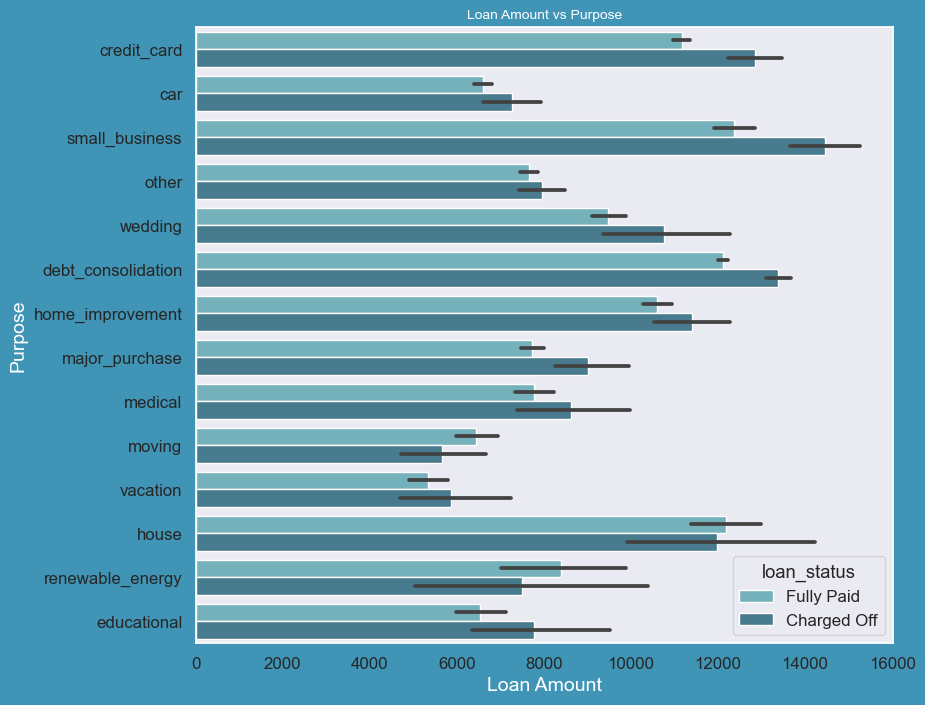

In [84]:
#Bivariate Analysis - Annual Income vs Purpose
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='loan_amnt', y='purpose', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Loan Amount vs Purpose',fontsize=10,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
ax.set_ylabel('Purpose',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that loan issues in last 3 month(mainly in Dec month) having a higher chance of loan Charged off
# In Year 2011 most of the loan Charged off happen.

Text(0, 0.5, 'Employment length')

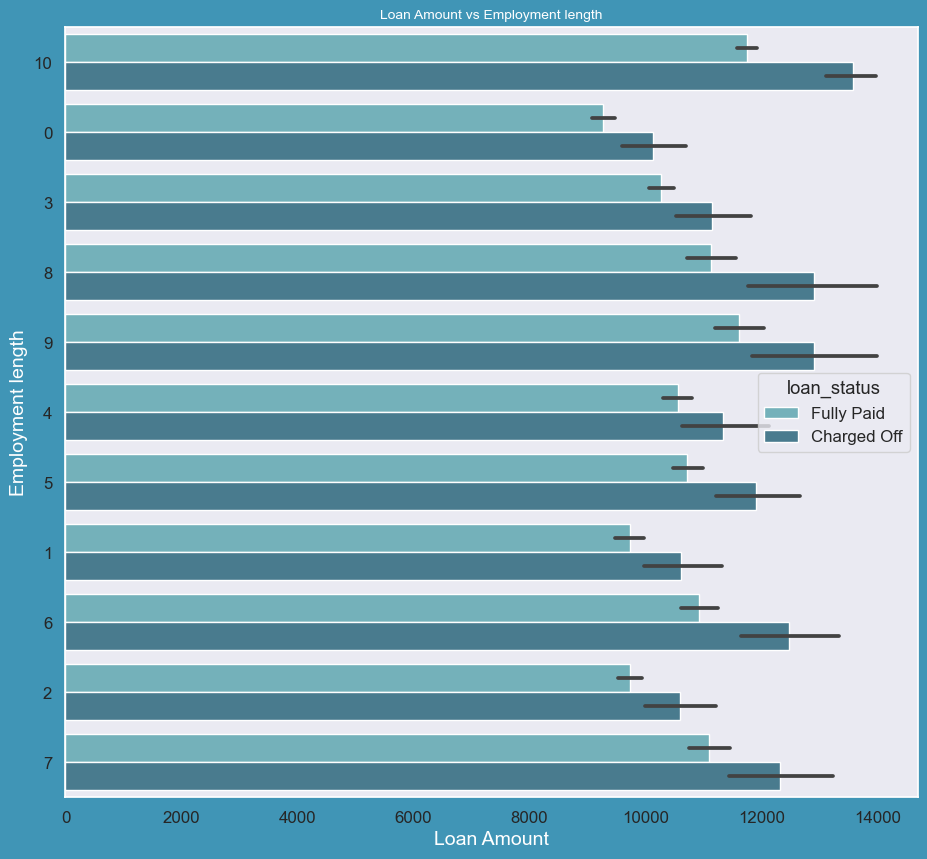

In [85]:
#Bivariate Analysis - Annual Income vs Employment length
plt.figure(figsize=(11,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='loan_amnt', y='emp_length', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Loan Amount vs Employment length',fontsize=10,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
ax.set_ylabel('Employment length',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that loan issues in last 3 month(mainly in Dec month) having a higher chance of loan Charged off
# In Year 2011 most of the loan Charged off happen.

Text(0, 0.5, 'Loan Amount')

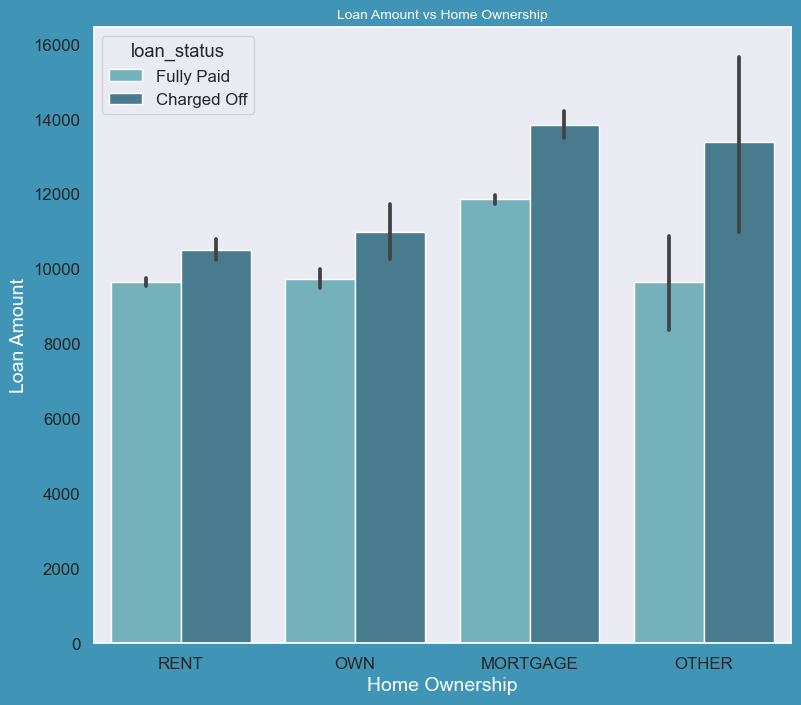

In [86]:
#Bivariate Analysis - Annual Income vs home_ownership
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='home_ownership', y='loan_amnt', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Loan Amount vs Home Ownership',fontsize=10,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Amount',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that loan issues in last 3 month(mainly in Dec month) having a higher chance of loan Charged off
# In Year 2011 most of the loan Charged off happen.

Text(0, 0.5, 'Loan Amount')

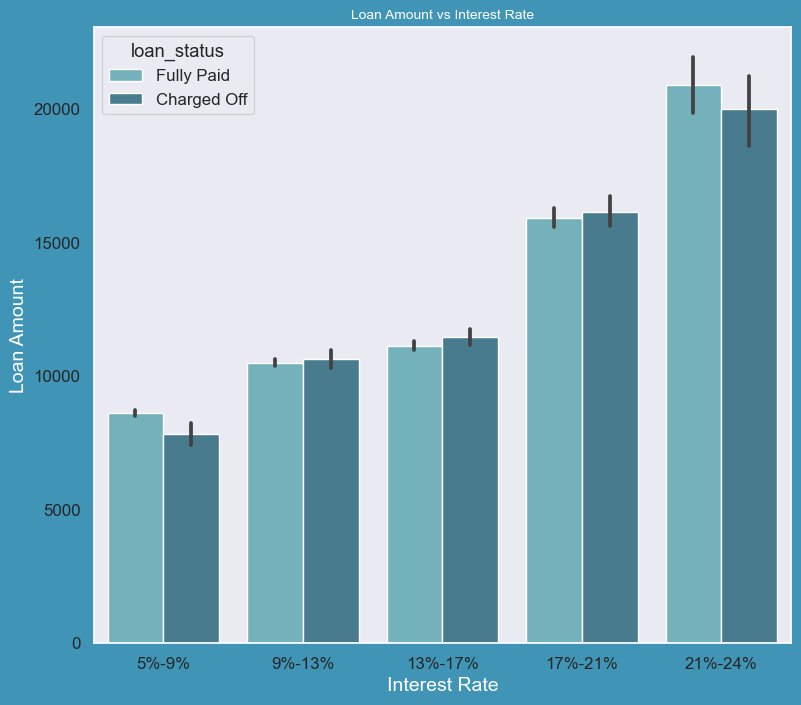

In [87]:
#Bivariate Analysis - Annual Income vs int_rate group
plt.figure(figsize=(9,8),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.barplot(x='int_rate_groups', y='loan_amnt', hue ='loan_status', data= lc_data, palette='GnBu_d' )
ax.set_title('Loan Amount vs Interest Rate',fontsize=10,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Loan Amount',fontsize=14,color = 'w')    


# Observations :
# Below plot shows that loan issues in last 3 month(mainly in Dec month) having a higher chance of loan Charged off
# In Year 2011 most of the loan Charged off happen.

# Observation summary of above bivariate analysis

### The above analysis with respect to the charged off loans. There is a more probability of Charged Off when : 

- Consumer taking loan for 'home improvement' and have annual income of 60k -70k
- Consumer employment length of 8 years and have annual income of 60k -70k
- Consumer whose home ownership is 'MORTGAGE and have annual income of 60-70k
- Consumer who receive interest at the rate of 21-24% and have an annual income of 60k-80k
- Consumer who have taken a loan for small business and the loan amount is in between 14k - 16k
- Consumer employment length of 10 years and the loan amount is in between 13k - 14k
- Consumer whose home ownership is 'MORTGAGE and have loan of 13k-15k
- Consumer who have taken a loan in the range 15k - 20K and are charged interest rate of 21%-24%